In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/cnn-pics/robert-tudor-EjHr26LqfhI-unsplash.jpg
/kaggle/input/cnn-pics/goa_pic.jpg


# Set Random seed
* If initial weights of the model will be the same, it makes easy to compare models

In [2]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(30)

# Explanation

**Convolution Layers**

The most important building block of a CNN is the convolutional layer:
neurons in the first convolutional layer are not connected to every single
pixel in the input image , but only to pixels in their receptive fields. In
turn, each neuron in the second convolutional layer is connected only to
neurons located within a small rectangle in the first layer. This
architecture allows the network to concentrate on small low-level features
in the first hidden layer, then assemble them into larger higher-level
features in the next hidden layer, and so on. This hierarchical structure is
common in real-world images, which is one of the reasons why CNNs
work so well for image recognition.
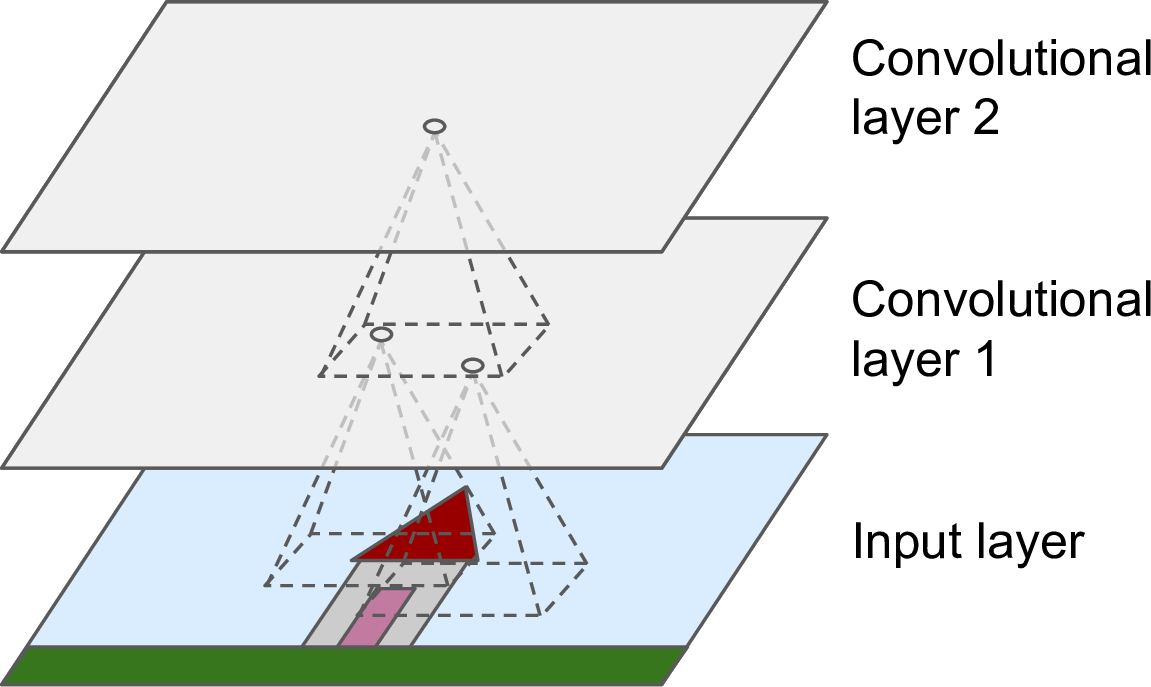

**Filters**

A neuron’s weights can be represented as a small image the size of the
receptive field. For example, Figure shows two possible sets of
weights, called filters (or convolution kernels). The first one is represented
as a black square with a vertical white line in the middle (it is a 7 × 7
matrix full of 0s except for the central column, which is full of 1s);
neurons using these weights will ignore everything in their receptive field
except for the central vertical line (since all inputs will get multiplied by
0, except for the ones located in the central vertical line). The second filter
is a black square with a horizontal white line in the middle. Once again,
neurons using these weights will ignore everything in their receptive field
except for the central horizontal line.

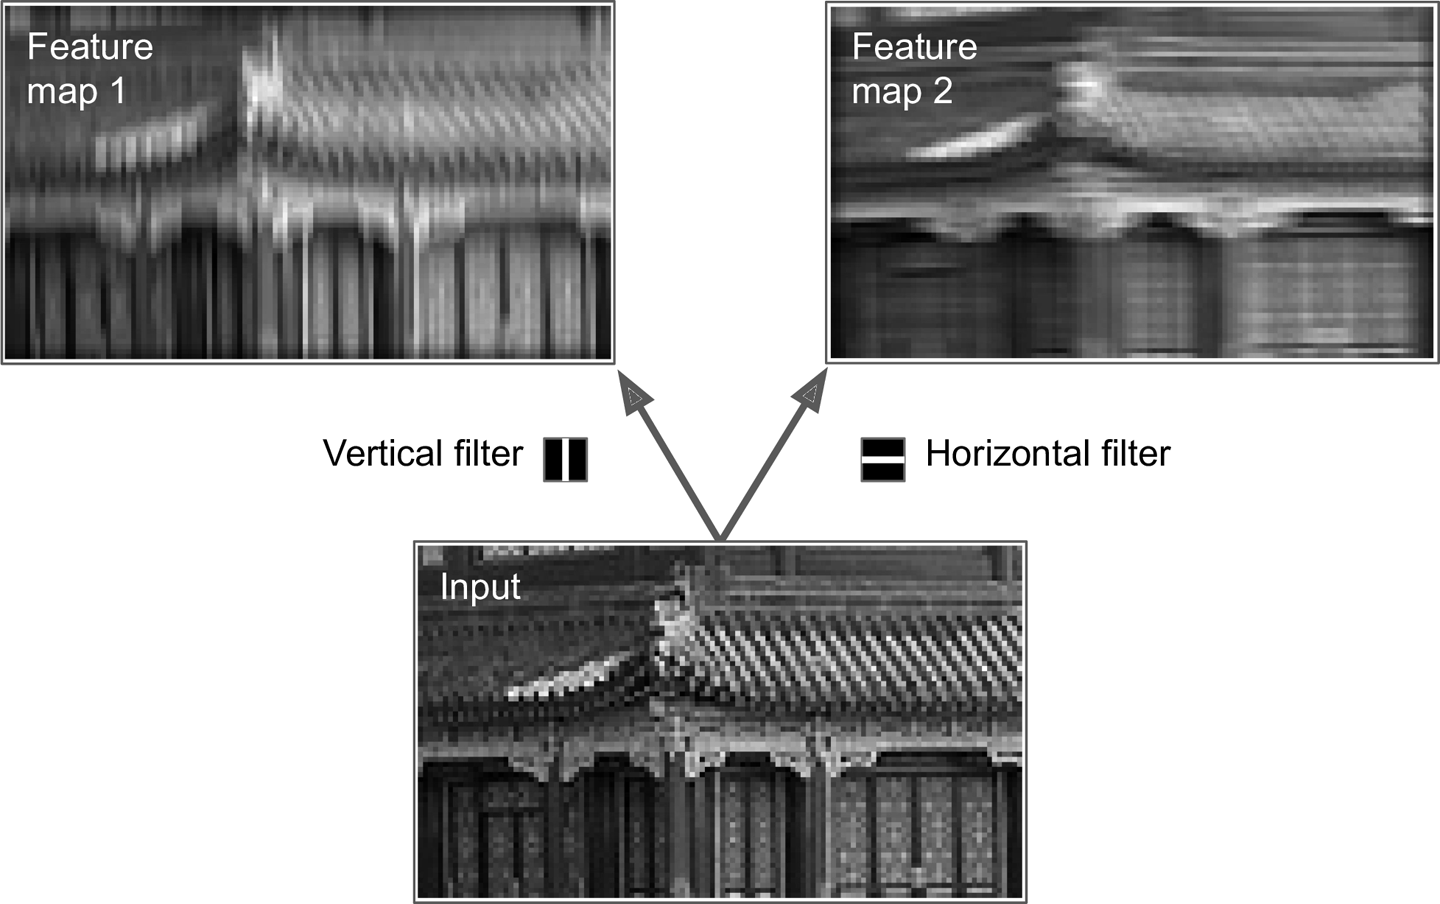

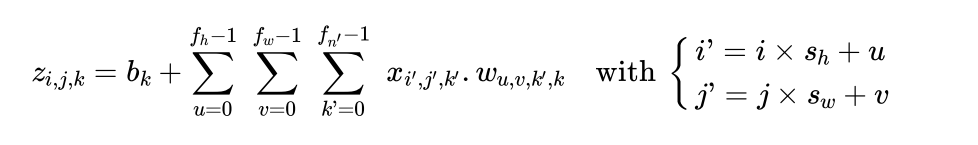

# Lets start with basic coding

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

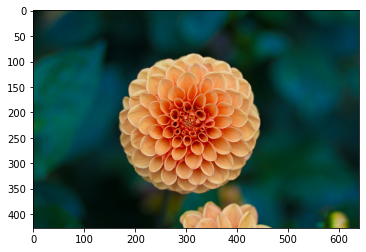

In [4]:
from sklearn.datasets import load_sample_image

#Load sample images
china = load_sample_image('china.jpg')
flower=load_sample_image("flower.jpg")
images=np.array([china,flower],dtype=np.float32)
batch_size,height,width,channels=images.shape
plt.imshow(flower, cmap="gray") 
plt.show();

In [5]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

2022-07-16 01:57:34.187937: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


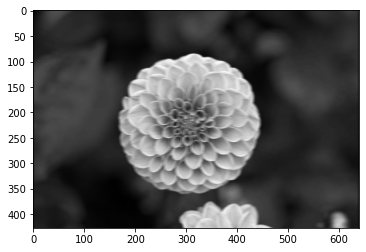

In [6]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
plt.imshow(outputs[1, :, :, 1], cmap="gray") # plot 1st image
plt.show();

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CNN models

In [8]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [9]:
df.shape

(42000, 785)

In [10]:
labels=np.array(df.iloc[:,0])
data=np.array(df.iloc[:,1:]/255).reshape(-1,28,28,1)
test_data=np.array(test/255).reshape(-1,28,28,1)

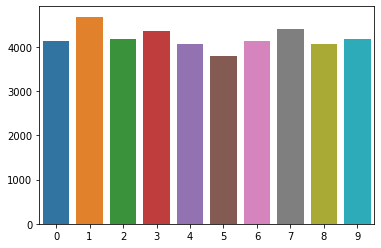

In [11]:
sns.barplot(x=df.iloc[:,0].value_counts().index,y=df.iloc[:,0].value_counts().values);

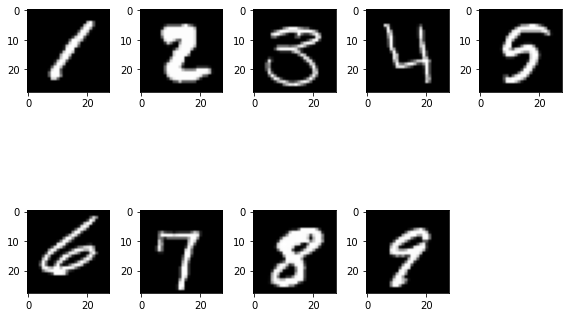

In [12]:
fig=plt.figure(figsize=(8,6))
for i in range(1,10):
    ax=fig.add_subplot(2, 5, i) 
    plt.imshow(data[df[df.iloc[:,0]==i].index[0]],cmap='gray')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
labels=ohe.fit_transform(labels.reshape(-1,1))

In [14]:
labels.shape

(42000, 10)

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2,stratify=labels)

In [16]:
import tensorflow.keras as k
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D,AvgPool2D,ZeroPadding2D
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Model-1

In [17]:
#model-1
def model1():
    model=k.models.Sequential()
    model.add(layers.Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Conv2D(128,3,activation='relu',padding='same'))
    model.add(layers.Conv2D(128,3,activation='relu',padding='same'))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Conv2D(256,3,activation='relu',padding='same'))
    model.add(layers.Conv2D(256,3,activation='relu',padding='same'))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10,activation='softmax'))
    return model

# Model-2

In [18]:
#model-2
def model2():
    model =k.models.Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'));
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    return model

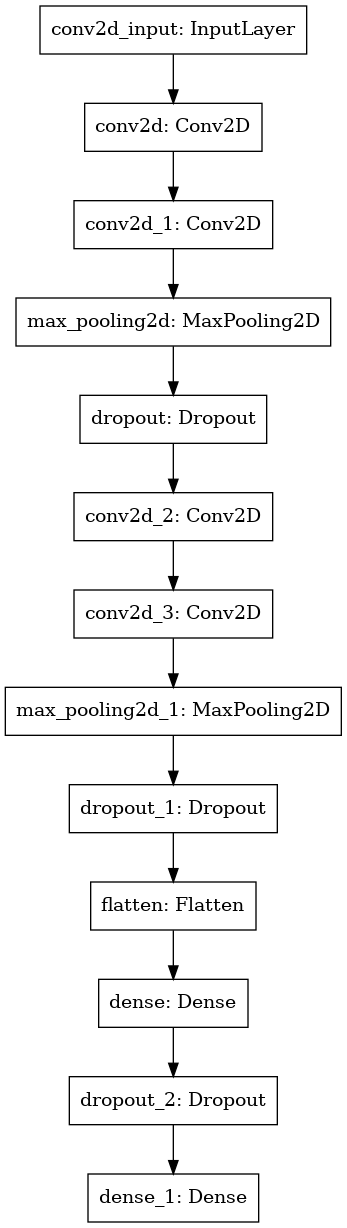

In [19]:
from tensorflow.keras.utils import plot_model
model=model2()
plot_model(model)

* To get accuracy more than 98%, increase the number of epochs
* callback function to calculate execution time

In [20]:
from timeit import default_timer as timer

class TimingCallback(k.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

* There are many hyperparameters to tweek: metrics, optimization, batch_size, epochs, learning rate

In [21]:
val_acc=[]
training_time=[]
batch_sizes=[32,64,128,256]
for i in batch_sizes:
    model=model2()
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
    cb = TimingCallback()
    model.fit(X_train,y_train, epochs=2,validation_data=(X_val,y_val),callbacks=[cb],batch_size=i)
    val_acc.append(model.history.history['val_accuracy'][-1])
    training_time.append(sum(cb.logs))

2022-07-16 01:57:47.911933: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
1050/1050 [==============================] - 80s 75ms/step - loss: 0.2106 - accuracy: 0.9330 - val_loss: 0.0747 - val_accuracy: 0.9788
Epoch 2/2
1050/1050 [==============================] - 79s 75ms/step - loss: 0.0773 - accuracy: 0.9779 - val_loss: 0.0588 - val_accuracy: 0.9852
Epoch 1/2
525/525 [==============================] - 72s 136ms/step - loss: 0.2362 - accuracy: 0.9241 - val_loss: 0.0739 - val_accuracy: 0.9783
Epoch 2/2
525/525 [==============================] - 72s 137ms/step - loss: 0.0792 - accuracy: 0.9768 - val_loss: 0.0573 - val_accuracy: 0.9842
Epoch 1/2
263/263 [==============================] - 69s 258ms/step - loss: 0.3074 - accuracy: 0.9031 - val_loss: 0.0728 - val_accuracy: 0.9788
Epoch 2/2
263/263 [==============================] - 69s 263ms/step - loss: 0.0817 - accuracy: 0.9753 - val_loss: 0.0746 - val_accuracy: 0.9780
Epoch 1/2
132/132 [==============================] - 68s 507ms/step - loss: 0.4003 - accuracy: 0.8689 - val_loss: 0.1061 - val_accurac

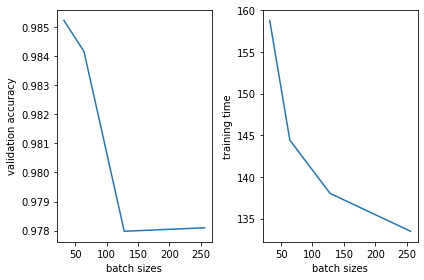

In [22]:
plt.subplot(1,2,1)
plt.plot(batch_sizes,val_acc)
plt.xlabel('batch sizes')
plt.ylabel('validation accuracy')

plt.subplot(1,2,2)
plt.plot(batch_sizes,training_time)
plt.xlabel('batch sizes')
plt.ylabel('training time')
plt.tight_layout()

* From the above graph, it is clear that as batch size increase the training time decreases
* Also, as number of epochs is less, we cannot conclude batch size=64 would give more accurate results.

In [23]:
model.optimizer.get_config()

{'name': 'RMSprop',
 'learning_rate': 0.001,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [24]:
model=model2()
cb = TimingCallback()
model.compile(optimizer=k.optimizers.Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
#early_stop = k.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(X_train,y_train, epochs=5,validation_data=(X_val,y_val),callbacks=[cb])
adam_history=model.history.history
print("training time: ",sum(cb.logs))

Epoch 1/5
1050/1050 [==============================] - 80s 76ms/step - loss: 0.2693 - accuracy: 0.9147 - val_loss: 0.0749 - val_accuracy: 0.9793
Epoch 2/5
1050/1050 [==============================] - 79s 75ms/step - loss: 0.0855 - accuracy: 0.9744 - val_loss: 0.0611 - val_accuracy: 0.9814
Epoch 3/5
1050/1050 [==============================] - 81s 77ms/step - loss: 0.0651 - accuracy: 0.9807 - val_loss: 0.0505 - val_accuracy: 0.9857
Epoch 4/5
1050/1050 [==============================] - 79s 75ms/step - loss: 0.0517 - accuracy: 0.9834 - val_loss: 0.0467 - val_accuracy: 0.9881
Epoch 5/5
1050/1050 [==============================] - 81s 77ms/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0436 - val_accuracy: 0.9883
training time:  399.5640643519996


In [25]:
model=model2()
cb = TimingCallback()
early_stop = k.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer=k.optimizers.Nadam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=64, epochs=5,validation_data=(X_val,y_val),callbacks=[cb,early_stop])
nadam_history=model.history.history
print("training time: ",sum(cb.logs))

Epoch 1/5
525/525 [==============================] - 77s 144ms/step - loss: 0.2944 - accuracy: 0.9033 - val_loss: 0.0722 - val_accuracy: 0.9796
Epoch 2/5
525/525 [==============================] - 75s 143ms/step - loss: 0.0855 - accuracy: 0.9733 - val_loss: 0.0604 - val_accuracy: 0.9838
Epoch 3/5
525/525 [==============================] - 76s 145ms/step - loss: 0.0649 - accuracy: 0.9797 - val_loss: 0.0576 - val_accuracy: 0.9848
Epoch 4/5
525/525 [==============================] - 75s 143ms/step - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.0437 - val_accuracy: 0.9876
Epoch 5/5
525/525 [==============================] - 75s 142ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0439 - val_accuracy: 0.9876
training time:  378.07939773399994


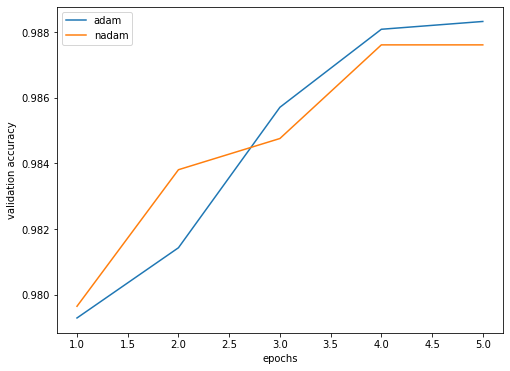

In [26]:
plt.subplots(figsize=(8,6))
plt.plot(range(1,6),adam_history['val_accuracy'],)
plt.plot(range(1,6),nadam_history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.legend(['adam','nadam']);

# Data augmentation 

In [27]:
datagen = k.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.20,
    shear_range=15,
    zoom_range=0.10,
    validation_split=0.25,
    horizontal_flip=False
)

train_generator = datagen.flow(
    data,
    labels, 
    batch_size=64,
    subset='training',
)

validation_generator = datagen.flow(
    data,
    labels, 
    batch_size=64,
    subset='validation',
)

In [28]:
# Set a learning rate annealer
lower_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [29]:
model=model2()
cb = TimingCallback()
early_stop = k.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
training_model= model.fit(train_generator, 
                          epochs=12, 
                          validation_data=validation_generator, 
                          callbacks=[cb,early_stop,lower_lr], 
                          verbose=1)
#model.fit(X_train,y_train,batch_size=64, epochs=12,validation_data=(X_val,y_val),callbacks=[cb,early_stop])
print("training time: ",sum(cb.logs))

Epoch 1/12
493/493 [==============================] - 83s 166ms/step - loss: 0.4903 - accuracy: 0.8443 - val_loss: 0.1515 - val_accuracy: 0.9533
Epoch 2/12
493/493 [==============================] - 81s 165ms/step - loss: 0.1564 - accuracy: 0.9536 - val_loss: 0.0936 - val_accuracy: 0.9683
Epoch 3/12
493/493 [==============================] - 81s 165ms/step - loss: 0.1174 - accuracy: 0.9648 - val_loss: 0.0835 - val_accuracy: 0.9740
Epoch 4/12
493/493 [==============================] - 81s 164ms/step - loss: 0.1030 - accuracy: 0.9698 - val_loss: 0.0680 - val_accuracy: 0.9790
Epoch 5/12
493/493 [==============================] - 82s 167ms/step - loss: 0.0975 - accuracy: 0.9718 - val_loss: 0.0663 - val_accuracy: 0.9793
Epoch 6/12
493/493 [==============================] - 80s 163ms/step - loss: 0.0859 - accuracy: 0.9752 - val_loss: 0.0672 - val_accuracy: 0.9811
Epoch 7/12
493/493 [==============================] - 81s 165ms/step - loss: 0.0844 - accuracy: 0.9757 - val_loss: 0.0640 - val_ac

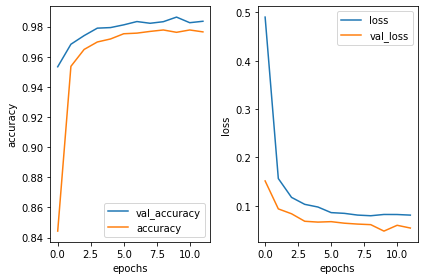

In [30]:
plt.title("model analysis")

plt.subplot(1,2,1)
plt.plot(training_model.history['val_accuracy'])
plt.plot(training_model.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['val_accuracy','accuracy'])

plt.subplot(1,2,2)
plt.plot(training_model.history['loss'])
plt.plot(training_model.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.tight_layout()

# LeNet Architecture

In [31]:
#method-2 for padding
#from tensorflow.image import pad_to_bounding_box
#padded_image=pad_to_bounding_box()

> Instead of adding padding for each epoch while running the model, it is better to first add zero padding to the input images(saves computation time).

**Using Lenet Architecture**

*MNIST images are 28*28 pixels, but they are zero padded to (32 *32) pixels.*

*The average pooling layers are slightly more complex than usual: each neuron computes the mean of its inputs, then multiplies the result by a learnable coefficient (one per map) and adds a learnable bias term (again, one per map), then finally applies the activation function.*


In [32]:
X_train_lenet=ZeroPadding2D(padding=2)(X_train)
X_val_lenet=ZeroPadding2D(padding=2)(X_val)
test_data_lenet=ZeroPadding2D(padding=2)(test_data)

In [33]:
#LeNet-5 architecture
def lenet():
    model =k.models.Sequential()
    #C1
    model.add(Conv2D(filters = 6, kernel_size = (5,5),padding = 'Same', activation ='tanh'))
    #S2
    model.add(AvgPool2D(pool_size=(2,2),strides=2))
    #C3
    model.add(Conv2D(filters=16,kernel_size=(5,5),activation='tanh'))
    #S4
    model.add(AvgPool2D(pool_size=(2,2),strides=2))
    #C5
    model.add(Conv2D(filters=120,kernel_size=(5,5),strides=(1,1)))
    #F6
    model.add(Flatten())
    model.add(Dense(84,activation='tanh'))
    #Out
    model.add(Dense(10,activation='softmax'))
    return model

In [34]:
# Set a learning rate annealer
lower_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

> using adam optimizer

In [35]:
model_lenet=lenet()
cb=TimingCallback()
early_stop = k.callbacks.EarlyStopping(monitor='loss', patience=3)
model_lenet.compile(optimizer=k.optimizers.Nadam(learning_rate=0.0005), loss='categorical_crossentropy',metrics=['accuracy'])
fitted_model=model_lenet.fit(X_train_lenet,y_train, epochs=5,validation_data=(X_val_lenet,y_val),callbacks=[lower_lr,cb,early_stop])
print("execution time= ",sum(cb.logs))

Epoch 1/5
1050/1050 [==============================] - 14s 11ms/step - loss: 0.3519 - accuracy: 0.8978 - val_loss: 0.2229 - val_accuracy: 0.9339
Epoch 2/5
1050/1050 [==============================] - 12s 12ms/step - loss: 0.1759 - accuracy: 0.9470 - val_loss: 0.1617 - val_accuracy: 0.9525
Epoch 3/5
1050/1050 [==============================] - 11s 11ms/step - loss: 0.1307 - accuracy: 0.9612 - val_loss: 0.1269 - val_accuracy: 0.9614
Epoch 4/5
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1017 - accuracy: 0.9692 - val_loss: 0.1169 - val_accuracy: 0.9652
Epoch 5/5
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0804 - accuracy: 0.9758 - val_loss: 0.0967 - val_accuracy: 0.9712
execution time=  60.19261181499951


In [36]:
history=fitted_model.history

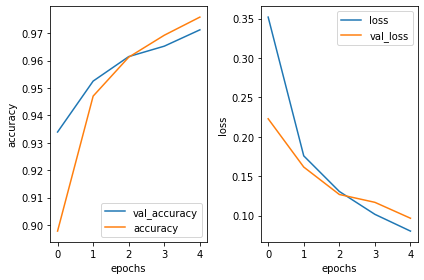

In [37]:
plt.title("model analysis")

plt.subplot(1,2,1)
plt.plot(history['val_accuracy'])
plt.plot(history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['val_accuracy','accuracy'])

plt.subplot(1,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.tight_layout()

In [38]:
pred=model.predict(test_data)
results=np.argmax(pred,axis=1)

In [39]:
submission=pd.DataFrame({'ImageId':range(1,len(results)+1),'Label':results})
submission.to_csv('submission.csv',index=False)

In [40]:
submission.isnull().sum()

ImageId    0
Label      0
dtype: int64